In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 83.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
 from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2014-12-27,184.9
2014-12-28,186.4
2014-12-29,185.7


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,694
1,2000-01-01 09:00:00,574
2,2000-01-01 10:00:00,400
3,2000-01-01 11:00:00,196
4,2000-01-01 12:00:00,3
...,...,...
54745,2014-12-31 13:00:00,0
54746,2014-12-31 14:00:00,0
54747,2014-12-31 15:00:00,0
54748,2014-12-31 16:00:00,0


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2011-12-27,179.4
2011-12-28,177.8
2011-12-29,180.3


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[694, 574, 400, ...,   0,   0,   0],
       [696, 577, 403, ...,   0,   0,   0],
       [698, 587, 412, ...,   0,   0,   0],
       ...,
       [697, 573, 396, ...,   0,   0,   0],
       [691, 570, 395, ...,   0,   0,   0],
       [685, 565, 379, ...,   0,   0,   0]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10,1)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[58.976254]]
[[128.06825]]
[[162.46786]]
[[177.06978]]
[[179.06981]]
[[187.36711]]
[[189.36679]]
[[190.46643]]
[[158.27274]]
[[117.167786]]
[[197.96567]]
[[204.46498]]
[[202.16516]]
[[203.46492]]
[[205.86476]]
[[208.26477]]
[[209.4643]]
[[210.26413]]
[[209.06427]]
[[208.76424]]
[[215.46349]]
[[213.36372]]
[[211.66386]]
[[213.36365]]
[[215.06346]]
[[217.96304]]
[[218.16304]]
[[219.16292]]
[[218.6625]]
[[218.56308]]
[[221.66254]]
[[215.76424]]
[[228.96172]]
[[230.76166]]
[[230.86118]]
[[232.46123]]
[[234.76091]]
[[232.96123]]
[[210.96123]]
[[239.76044]]
[[239.76028]]
[[241.66011]]
[[232.76059]]
[[238.06052]]
[[239.86026]]
[[242.26003]]
[[246.55951]]
[[249.6591]]
[[249.659]]
[[249.35913]]
[[256.15833]]
[[257.95813]]
[[260.0579]]
[[257.75824]]
[[261.45776]]
[[263.75748]]
[[264.65735]]
[[263.35748]]
[[266.55713]]
[[255.65874]]
[[255.65857]]
[[256.55838]]
[[257.75845]]
[[260.858]]
[[260.8582]]
[[261.55826]]
[[262.55783]]
[[263.0576]]
[[265.15756]]
[[267.05725]]
[[266.0572]]
[[266.75693]]
[[

[array([[58.976254]], dtype=float32),
 array([[128.06825]], dtype=float32),
 array([[162.46786]], dtype=float32),
 array([[177.06978]], dtype=float32),
 array([[179.06981]], dtype=float32),
 array([[187.36711]], dtype=float32),
 array([[189.36679]], dtype=float32),
 array([[190.46643]], dtype=float32),
 array([[158.27274]], dtype=float32),
 array([[117.167786]], dtype=float32),
 array([[197.96567]], dtype=float32),
 array([[204.46498]], dtype=float32),
 array([[202.16516]], dtype=float32),
 array([[203.46492]], dtype=float32),
 array([[205.86476]], dtype=float32),
 array([[208.26477]], dtype=float32),
 array([[209.4643]], dtype=float32),
 array([[210.26413]], dtype=float32),
 array([[209.06427]], dtype=float32),
 array([[208.76424]], dtype=float32),
 array([[215.46349]], dtype=float32),
 array([[213.36372]], dtype=float32),
 array([[211.66386]], dtype=float32),
 array([[213.36365]], dtype=float32),
 array([[215.06346]], dtype=float32),
 array([[217.96304]], dtype=float32),
 array([[218

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

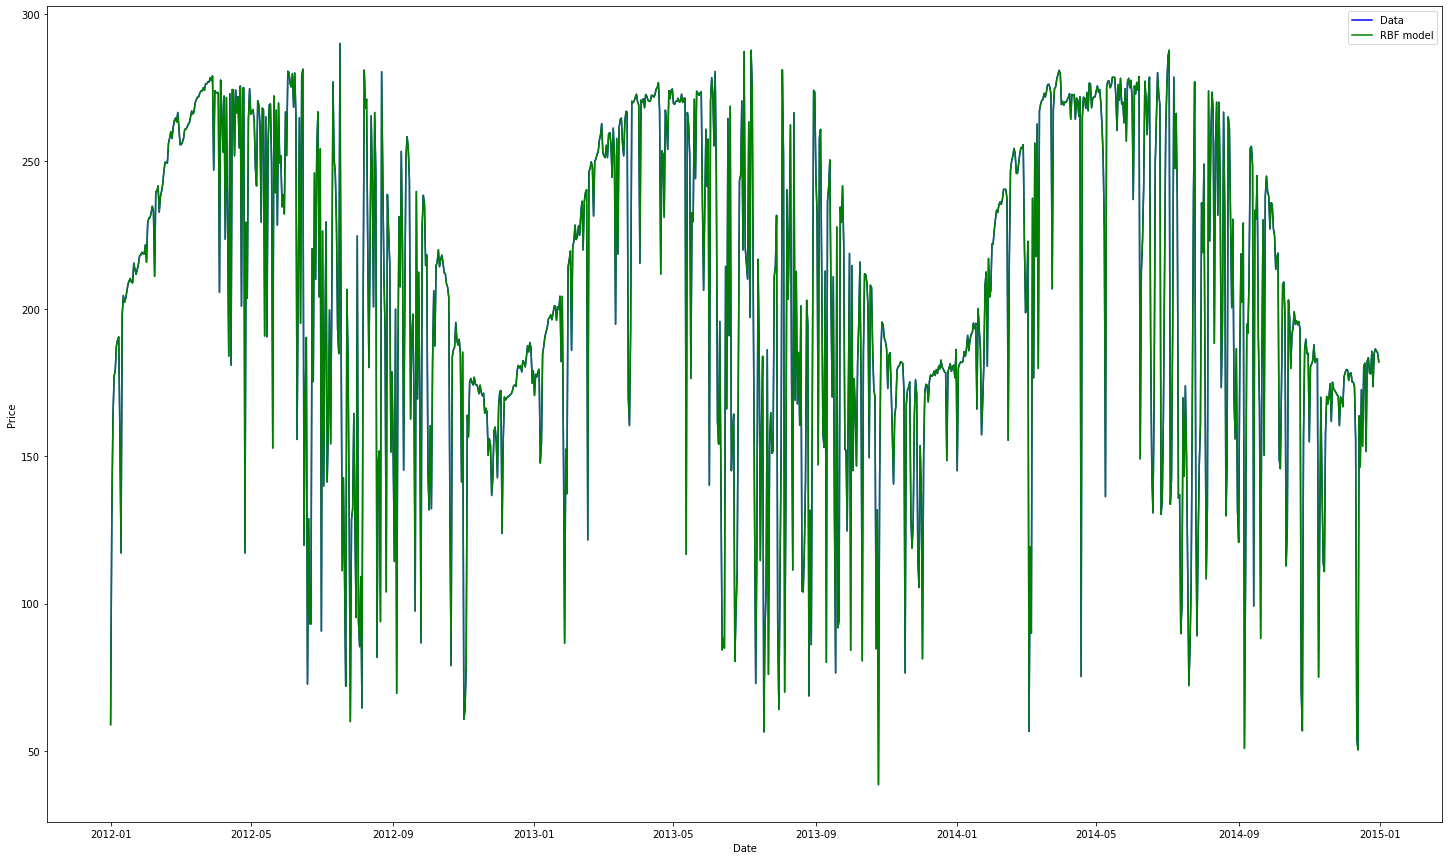

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

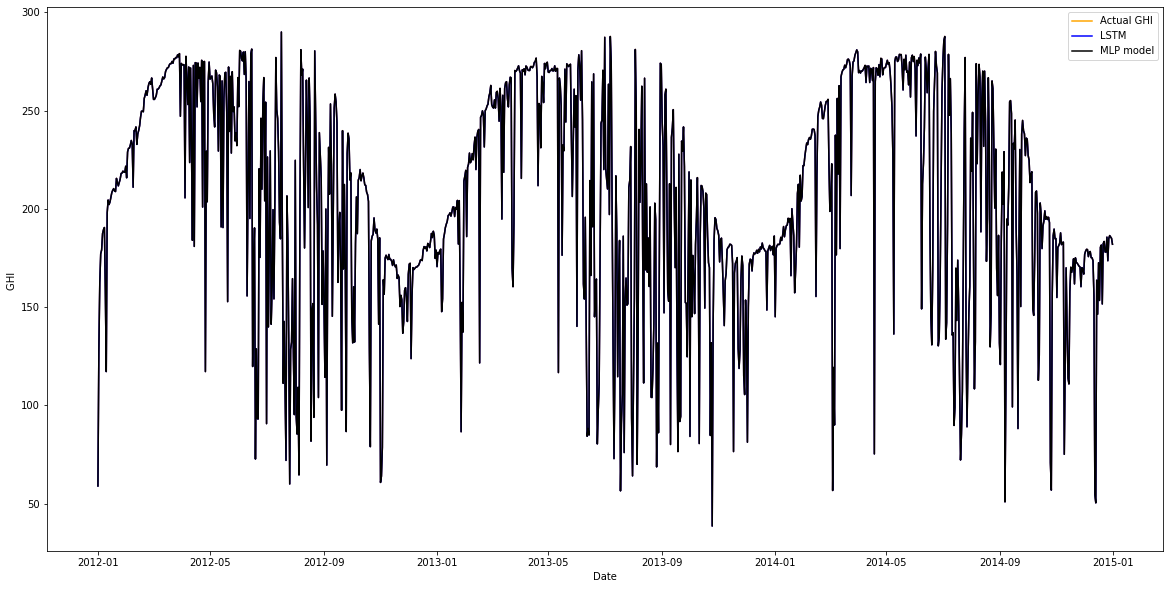

In [22]:
#df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/SARIMAdaily.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Telangana1/MLPdaily.csv')

plt.figure(figsize = (20,10))
plt.plot(y[4380:].index, y[4380:], color= 'orange', label= 'Actual GHI')
plt.plot(y[4380:].index, np.asarray(yhat).reshape(1095,) , color= 'blue', label= 'LSTM')
#plt.plot(y[4380:].index,df1['Prediction'] , color= 'green', label= 'SARIMA model') 
plt.plot(y[4380:].index, df2['GHI'], color= 'black', label= 'MLP model')
plt.xlabel('Date')
plt.ylabel('GHI ')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.036068890311296245

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

0.0001702752360722128